## Final Project Submission

Please fill out:
* Student name: Tabitha Berum
* Student pace: full time
* Scheduled project review date/time: 22, March 2024
* Instructor name: Diana Mongina
* Blog post URL: N/A


# Overview
The project's goal is to create an analysis using information on movies, including production budgets, sales and the percentage of viewers that like each film, gathered from many websites. This analysis's outcome will make it easier to select the greatest film to produce financially for the future Microsoft Studios.

# Business Understanding
Microsoft Studios wants to produce original video content, but they have no idea how to go about doing so. The goal of this analysis is to explore what types of films are doing the best and will most likely generate revenue post production.
This will be done in the following steps:
    1. Defining key factors to evaluate a film's profitability using production budget, ratings or gross revenue.
    2. Examining profitability of different movie attributes like release date, genre and  popularity.
    

# Data Understanding

This analysis will focus on three datasets:
    - IMDB database has data on movie basics, title, genres, director. This will help us come up with a good movie choice right from conception phase.
    
    -Box Office Movies, this data entails the gross sales made on movies produced.
    
    -The Movie DB, this is data entails the ratings (votes fro audiences) on movies based on the release dates and genre of the produced movies.

    -The Numbers, this gives us an insight of the cost of the entire process of making a movie from production, release date and the gross revenue that was made from the movies.


##      Data Preparation

Importing Libraries

In [33]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sqlite3

%matplotlib inline

In [34]:
# Connect to sql database
conn = sqlite3.connect('./unzippedData/im.db')

# Query an sql file by returning it as a dataframe
def sqldata(query):
    return pd.read_sql(query, conn)


From the database, let's fetch data from the movie_ratings table. Check for the meadian and mean of the ratings.

In [86]:
movie_ratings = """
                  SELECT * FROM movie_ratings;
                 """
pd.read_sql(movie_ratings, conn)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [87]:
 pd.read_sql(movie_ratings, conn).describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [277]:
movie_avgrating = """
SELECT * FROM movie_ratings 
JOIN movie_basics ON movie_ratings.movie_id = movie_basics.movie_id
ORDER BY averagerating DESC;

"""
pd.read_sql(movie_avgrating, conn)

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5390098,10.0,5,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary
1,tt6295832,10.0,5,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary
2,tt1770682,10.0,5,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
3,tt2632430,10.0,5,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
4,tt8730716,10.0,5,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
...,...,...,...,...,...,...,...,...,...
73851,tt7926296,1.0,17,tt7926296,Nakhodka interneta,Nakhodka interneta,2017,162.0,Drama
73852,tt3235258,1.0,510,tt3235258,My First Love,Hatsukoi,2013,82.0,Drama
73853,tt7831076,1.0,96,tt7831076,"Yes, Sir! 7","Yes, Sir! 7",2016,111.0,"Comedy,Drama"
73854,tt3262718,1.0,223,tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama


In [121]:
# Query the bottom 50 ratings that got a score of over 49
movie_genres = """
SELECT genres FROM movie_basics 
LEFT JOIN movie_ratings 
ON movie_basics.movie_id = movie_ratings.movie_id
WHERE numvotes < 49 ORDER BY averagerating ASC
LIMIT 50
"""
pd.read_sql(movie_genres, conn)



,genres
0,Documentary
1,Horror
2,Animation
3,Documentary
4,"Drama,Horror,Thriller"
5,Comedy
6,Drama
7,"Horror,Thriller"
8,"Adventure,Drama,Sci-Fi"
9,"Documentary,Music"


In [122]:
# Reassign movie_genres to the variable 'bottom_movie_genres' and use .split() so that we can get individual counts of lowest genres
bottom_movie_genres = pd.read_sql(movie_genres, conn)

bottom_movie_genres_split = bottom_movie_genres.genres.str.split(',')
bottom_movie_genres_split

0                  [Documentary]
1                       [Horror]
2                    [Animation]
3                  [Documentary]
4      [Drama, Horror, Thriller]
5                       [Comedy]
6                        [Drama]
7             [Horror, Thriller]
8     [Adventure, Drama, Sci-Fi]
9           [Documentary, Music]
10                [Drama, Music]
11                       [Drama]
12                 [Documentary]
13                    [Thriller]
14                      [Horror]
15      [Drama, Family, Romance]
16    [Action, Sci-Fi, Thriller]
17                      [Comedy]
18               [Comedy, Drama]
19                      [Horror]
20     [Drama, Horror, Thriller]
21           [Adventure, Comedy]
22                 [Documentary]
23                      [Horror]
24       [Comedy, Drama, Horror]
25    [Action, Horror, Thriller]
26                       [Drama]
27                       [Drama]
28                       [Drama]
29                       [Drama]
30     [Dr

In [125]:
bottom_movie_genres_split.isnull().sum()

2

In [128]:
bottom_movie_genres_split.dropna(inplace = True)
bottom_movie_genres_split

0                  [Documentary]
1                       [Horror]
2                    [Animation]
3                  [Documentary]
4      [Drama, Horror, Thriller]
5                       [Comedy]
6                        [Drama]
7             [Horror, Thriller]
8     [Adventure, Drama, Sci-Fi]
9           [Documentary, Music]
10                [Drama, Music]
11                       [Drama]
12                 [Documentary]
13                    [Thriller]
14                      [Horror]
15      [Drama, Family, Romance]
16    [Action, Sci-Fi, Thriller]
17                      [Comedy]
18               [Comedy, Drama]
19                      [Horror]
20     [Drama, Horror, Thriller]
21           [Adventure, Comedy]
22                 [Documentary]
23                      [Horror]
24       [Comedy, Drama, Horror]
25    [Action, Horror, Thriller]
26                       [Drama]
27                       [Drama]
28                       [Drama]
29                       [Drama]
30     [Dr

Let's now fetch the top 50 movies with the ratings of above 50

In [144]:
tp_movie_genres = """
SELECT genres FROM movie_basics LEFT JOIN movie_ratings
ON movie_basics.movie_id = movie_ratings.movie_id
AND numvotes > 49
ORDER BY averagerating DESC
LIMIT 50;
"""
pd.read_sql(tp_movie_genres, conn)

,genres
0,Drama
1,"Comedy,Drama"
2,Drama
3,Documentary
4,"Adventure,Biography,Documentary"
5,"Documentary,Drama,Music"
6,"Biography,Drama,History"
7,Drama
8,"Comedy,Drama,Family"
9,Comedy


In [145]:
top_movie_genres = pd.read_sql(tp_movie_genres, conn)

top_movie_genres_split = top_movie_genres.genres.str.split(',')
top_movie_genres_split

0                                 [Drama]
1                         [Comedy, Drama]
2                                 [Drama]
3                           [Documentary]
4     [Adventure, Biography, Documentary]
5             [Documentary, Drama, Music]
6             [Biography, Drama, History]
7                                 [Drama]
8                 [Comedy, Drama, Family]
9                                [Comedy]
10                               [Action]
11                            [Biography]
12                [Comedy, Drama, Family]
13                       [Drama, History]
14                   [Documentary, Music]
15                          [Documentary]
16                          [Documentary]
17                                [Drama]
18                          [Documentary]
19                                [Drama]
20                          [Documentary]
21                          [Documentary]
22               [Comedy, Drama, Musical]
23                          [Docum

In [149]:
def get_movie_genre_counts (movie_genres_split):
    movie_genre_counts = {
        "Documentary": 0,
        "Drama": 0,
        "Music": 0,
        "Comedy": 0,
        "Family" : 0,
        "Romance" : 0,
        "Adventure" : 0,
        "Biography" : 0,
        "History" : 0,
        "Musical" : 0,
        "Sport" : 0,
        "Action" : 0,
        "Fantasy" : 0,
        "Mystery" : 0,
        "Horror" : 0,
        "Animation" : 0,
        "Thriller" : 0,
        "Sci-Fi": 0,
        "Crime": 0,
        "War" : 0,
        "Western" :0,
    }


    for genre in movie_genres_split:
        for item in genre:
            movie_genre_counts[item] +=1
    return movie_genre_counts

In [182]:
top_movie_genres_counts = get_movie_genre_counts (top_movie_genres_split)
top_movie_genres_counts


{'Documentary': 32,
 'Drama': 16,
 'Music': 3,
 'Comedy': 7,
 'Family': 3,
 'Romance': 1,
 'Adventure': 2,
 'Biography': 5,
 'History': 3,
 'Musical': 1,
 'Sport': 2,
 'Action': 2,
 'Fantasy': 0,
 'Mystery': 0,
 'Horror': 0,
 'Animation': 0,
 'Thriller': 0,
 'Sci-Fi': 0,
 'Crime': 1,
 'War': 1,
 'Western': 0}

In [237]:
top_movie_genre_counts = (get_movie_genre_counts (top_movie_genres_split))
top_movie_genre_counts_df = pd.DataFrame.from_dict(top_movie_genre_counts, orient='index')
top_movie_genre_counts_df

,0
Documentary,32
Drama,16
Music,3
Comedy,7
Family,3
Romance,1
Adventure,2
Biography,5
History,3
Musical,1


In [183]:
bottom_movie_genres_counts = get_movie_genre_counts (bottom_movie_genres_split)
bottom_movie_genres_counts


{'Documentary': 6,
 'Drama': 18,
 'Music': 2,
 'Comedy': 7,
 'Family': 1,
 'Romance': 1,
 'Adventure': 2,
 'Biography': 0,
 'History': 0,
 'Musical': 0,
 'Sport': 1,
 'Action': 4,
 'Fantasy': 0,
 'Mystery': 0,
 'Horror': 21,
 'Animation': 1,
 'Thriller': 14,
 'Sci-Fi': 2,
 'Crime': 2,
 'War': 0,
 'Western': 0}

Load data from the other datasets (.csv files) after which  explore each dataset to know if there's any anomalies. 

In [ ]:
# Loading data from all datasets

gross_data = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
tmdb_data = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
budgets_data = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')



In [ ]:
#Fetch first 5 indexes of each dataset
display(
        gross_data.head(),
        budgets_data.head(),
        tmdb_data.head()
        )

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
# Checking for the information in the gross_data and tmdb_data datasets.
display(
    gross_data.info(),
    tmdb_data.info()
    )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date     

None

None

In [ ]:
# Checking for all the information in the budgets_data dataset
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
# Checking for missing values
display(
    gross_data.isnull().sum(),
    tmdb_data.isnull().sum(),
    budgets_data.isnull().sum()
)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [ ]:
# Drop rows with missing values
gross_data.dropna(inplace=True)

In [ ]:
# Checking for values that have duplicates in the datasets
display(
    gross_data.duplicated().sum(),
    tmdb_data.duplicated().sum(),
    budgets_data.duplicated().sum()
    )

0

0

0

TMDB_DATA

In [ ]:
# create a new column 'release_month' returning just the month as opposed to the date format
tmdb_data['release_month'] = tmdb_data['release_date'].str[5:7]
tmdb_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,03
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,05
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,07


In [ ]:
# Look for mean of every column in tmdb_data and group them by month that they were released (release_month)
grouped_tmdb_data = tmdb_data.groupby('release_month')
grouped_tmdb_data.mean()

,Unnamed: 0,id,popularity,vote_average,vote_count
release_month,,,,,
01,12421.901980,289163.437101,2.180176,5.866762,65.612388
02,13681.524783,284874.361834,3.352600,5.958240,189.337670
03,14003.534497,289719.502909,3.052933,6.042810,168.189942
04,13902.661341,296493.706937,2.784293,6.117537,120.299299
05,13458.068633,293177.639678,3.123663,6.003539,230.502413
06,13376.954755,293923.416898,3.043683,6.067959,203.485688
07,13026.402261,291002.682846,3.585265,5.883710,304.916223
08,13138.877503,295222.210247,3.580677,5.908539,187.911661
09,13049.484099,296616.382067,3.265490,5.955300,167.389134


In [163]:
# Examining the popularity descriptive statistics
grouped_tmdb_data['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
release_month,,,,,,,,
01,3132.0,2.180176,2.974335,0.6,0.60000,0.8830,2.17800,28.138
02,1614.0,3.352600,4.304551,0.6,0.62400,1.5130,4.55400,45.253
03,2406.0,3.052933,3.931685,0.6,0.60000,1.4000,3.77100,45.000
04,2566.0,2.784293,3.783140,0.6,0.60000,1.2410,3.25175,80.773
05,1865.0,3.123663,4.683931,0.6,0.60000,1.3470,3.59900,50.289
06,2166.0,3.043683,4.236429,0.6,0.60000,1.3565,3.38750,36.286
07,1504.0,3.585265,4.990946,0.6,0.62875,1.4000,4.77250,46.775
08,1698.0,3.580677,4.426682,0.6,0.60000,1.6020,5.42175,49.606
09,2264.0,3.265490,4.136450,0.6,0.60150,1.4000,4.38850,36.955


In [165]:
# Fetch the mean for the movie_popularity column
movie_popularity = grouped_tmdb_data['popularity'].mean()
movie_popularity

release_month
01    2.180176
02    3.352600
03    3.052933
04    2.784293
05    3.123663
06    3.043683
07    3.585265
08    3.580677
09    3.265490
10    3.081957
11    3.459795
12    3.922681
Name: popularity, dtype: float64

BUDGETS_DATA


 In this dataset our ficus will be on domestic_gross, worlwide_gross and production_gross because we want to understand the revenue generated between the production and post production stage. 

In [38]:
# To remove the dollar sign, convert amount of money datatype from string to float

def float_amount(df, column_name):
    df[column_name] = df[column_name].str[1:]
    df[column_name] = df[column_name].str.replace(',', '').astype(float)

float_amount(budgets_data, 'production_budget')
float_amount(budgets_data, 'domestic_gross')
float_amount(budgets_data, 'worldwide_gross')

budgets_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [44]:
# Create a new column 'foreign_gross'; this is the difference between the domestic sales ('domestic_gross') and worldwide sales ('worldwide_gross)

budgets_data['foreign_gross'] = budgets_data['worldwide_gross'] - budgets_data['domestic_gross']

# Sort the values in a descending order
budgets_data['foreign_gross'].sort_values(ascending = False)
budgets_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08


In [46]:
# Add a new column and assign it to the variable 'release_month'
budgets_data['release_month'] = budgets_data['release_date'].str[0:3]
budgets_data.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0,0.0,Dec
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0,192013.0,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,0.0,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0,0.0,Sep
5781,82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041.0,0.0,Aug


In [167]:
# This is to check the number of times '0' occurs in all the gross columns?

zero_worldwide_gross = budgets_data[budgets_data['worldwide_gross'] == 0]

zero_worldwide_gross.info()
zero_worldwide_gross.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 194 to 5780
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 367 non-null    int64  
 1   release_date       367 non-null    object 
 2   movie              367 non-null    object 
 3   production_budget  367 non-null    float64
 4   domestic_gross     367 non-null    float64
 5   worldwide_gross    367 non-null    float64
 6   foreign_gross      367 non-null    float64
 7   release_month      367 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 25.8+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
194,95,"Dec 31, 2020",Moonfall,150000000.0,0.0,0.0,0.0,Dec
479,80,"Dec 13, 2017",Bright,90000000.0,0.0,0.0,0.0,Dec
480,81,"Dec 31, 2019",Army of the Dead,90000000.0,0.0,0.0,0.0,Dec
535,36,"Feb 21, 2020",Call of the Wild,82000000.0,0.0,0.0,0.0,Feb
670,71,"Aug 30, 2019",PLAYMOBIL,75000000.0,0.0,0.0,0.0,Aug


In [56]:
# Drop the columns with 0 to have a clean dataset that has relevant values
budgets_data_clean = budgets_data.drop(budgets_data[budgets_data['worldwide_gross'] ==0].index)
budgets_data_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec


In [59]:
# Once again group the budgets_data by month ('release month')
budgets_data_month = budgets_data_clean.groupby('release_month')
budgets_data_month.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross
release_month,,,,,
Apr,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.417253e+07
Aug,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.021112e+07
Dec,50.156200,3.823086e+07,5.530613e+07,1.219991e+08,6.669292e+07
Feb,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,3.827814e+07
Jan,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.392418e+07
Jul,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,8.326333e+07
Jun,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,8.003695e+07
Mar,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,4.492814e+07
May,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,9.897459e+07


In [61]:
# Add a new column and assign it to the variable 'month_number'.
months_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12 }

# write a for loop that iterates through the 'release_month' column and assigns each month a number from 1 to 12. This will be stored in the new column month_number
month_num_list = []
for month in budgets_data_clean['release_month']:
    month_num = months_dict[month]
    month_num_list.append(month_num)
budgets_data_clean['month_number'] = month_num_list
budgets_data_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12


In [62]:
# Group budget_data_clean by the newly formed month_number
budgets_data_month = budgets_data_clean.groupby('month_number')
budgets_data_month.mean()

# You will notice from the ouput that the dataframe has been group by months in numerical format and not the former conotation of monthly names in alphabet.

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross
month_number,,,,,
1,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.392418e+07
2,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,3.827814e+07
3,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,4.492814e+07
4,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.417253e+07
5,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,9.897459e+07
6,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,8.003695e+07
7,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,8.326333e+07
8,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.021112e+07
9,48.381974,2.272352e+07,2.449119e+07,4.939912e+07,2.490793e+07


In [63]:
# Let's generate descriptive statistics by using .describe()
budgets_data_month['domestic_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,2.533694e+07,2.867713e+07,0.0,2380013.00,16204811.0,3.827525e+07,146336178.0
2,370.0,3.752039e+07,5.746583e+07,0.0,4050716.75,20267527.5,5.032184e+07,700059566.0
3,440.0,4.120296e+07,6.250563e+07,0.0,3484683.75,18733294.5,5.275792e+07,504014165.0
4,433.0,2.865379e+07,5.248817e+07,0.0,1224330.00,14249005.0,3.628070e+07,678815482.0
5,393.0,6.907396e+07,1.016921e+08,0.0,2956000.00,21540363.0,9.138720e+07,623279547.0
6,459.0,6.869623e+07,9.156077e+07,0.0,5007814.00,38311134.0,1.012066e+08,652270625.0
7,424.0,6.301966e+07,8.152030e+07,0.0,5768193.50,33034174.5,8.901194e+07,533720947.0
8,473.0,3.373241e+07,4.587340e+07,0.0,3100000.00,19184820.0,4.472664e+07,333172112.0
9,466.0,2.449119e+07,3.351091e+07,0.0,1490118.00,12799007.0,3.504984e+07,327481748.0


In [64]:
budgets_data_month['worldwide_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,4.926112e+07,6.691056e+07,673.0,4261841.75,24843762.0,7.068974e+07,5.175991e+08
2,370.0,7.579852e+07,1.238435e+08,3604.0,7929280.00,37849452.0,8.645606e+07,1.348258e+09
3,440.0,8.613110e+07,1.552561e+08,3234.0,7282899.00,28711776.5,9.263332e+07,1.259200e+09
4,433.0,6.282632e+07,1.616966e+08,527.0,4023741.00,22910563.0,6.417045e+07,2.048134e+09
5,393.0,1.680485e+08,2.595341e+08,528.0,6244618.00,35681080.0,2.550000e+08,1.517936e+09
6,459.0,1.487332e+08,2.258933e+08,1217.0,9401650.00,54876855.0,2.153745e+08,1.648855e+09
7,424.0,1.462830e+08,2.192839e+08,1338.0,10764080.75,58978298.0,1.748570e+08,1.341693e+09
8,473.0,6.394353e+07,9.897115e+07,401.0,5617460.00,26887177.0,8.068118e+07,7.708675e+08
9,466.0,4.939912e+07,7.634508e+07,1822.0,4244109.25,22336591.0,5.838477e+07,6.974580e+08


In [65]:
# After comparing all the gross columns, the min values '0' occur because some movies only generated domestic revenue
budgets_data_month['foreign_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,2.392418e+07,4.849461e+07,0.0,0.00,2709992.0,2.862173e+07,3.740705e+08
2,370.0,3.827814e+07,7.601360e+07,0.0,1657.00,8610522.0,4.084868e+07,6.481987e+08
3,440.0,4.492814e+07,9.786655e+07,0.0,8789.00,8584576.0,4.200565e+07,7.551855e+08
4,433.0,3.417253e+07,1.143279e+08,0.0,0.00,4615682.0,2.700038e+07,1.369319e+09
5,393.0,9.897459e+07,1.648751e+08,0.0,47469.00,11999999.0,1.382581e+08,9.440081e+08
6,459.0,8.003695e+07,1.422974e+08,0.0,54199.50,13556787.0,1.056281e+08,9.965842e+08
7,424.0,8.326333e+07,1.456406e+08,0.0,97116.75,19312855.5,9.546976e+07,9.605000e+08
8,473.0,3.021112e+07,5.933793e+07,0.0,0.00,3467655.0,3.433392e+07,4.376954e+08
9,466.0,2.490793e+07,4.857892e+07,0.0,12606.00,5310087.0,2.924530e+07,3.699762e+08


In [70]:
# Using the .describe() function, lets check the release years form the oldest to the most recent movie.
budgets_data_clean['release_year'] = budgets_data_clean['release_date'].str[-4:].astype(int)
budgets_data_clean['release_year'].describe()

count    5415.000000
mean     2003.599446
std        12.546965
min      1915.000000
25%      1999.000000
50%      2006.000000
75%      2012.000000
max      2019.000000
Name: release_year, dtype: float64

In [71]:
#Let's try sorting the dataframe by release_year
budgets_data_clean = budgets_data_clean.sort_values('release_year')
budgets_data_clean

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
5677,78,"Feb 8, 1915",The Birth of a Nation,110000.0,10000000.0,11000000.0,1000000.0,Feb,2,1915
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0,0.0,Dec,12,1916
5683,84,"Sep 17, 1920",Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0,0.0,Sep,9,1920
4569,70,"Dec 30, 1925",Ben-Hur: A Tale of the Christ,3900000.0,9000000.0,9000000.0,0.0,Dec,12,1925
5606,7,"Nov 19, 1925",The Big Parade,245000.0,11000000.0,22000000.0,11000000.0,Nov,11,1925
...,...,...,...,...,...,...,...,...,...,...
1176,77,"Apr 12, 2019",Hellboy,50000000.0,21903748.0,40725492.0,18821744.0,Apr,4,2019
3835,36,"Jan 16, 2019",Dragon Ball Super: Broly,8500000.0,30376755.0,122747755.0,92371000.0,Jan,1,2019
496,97,"Apr 5, 2019",Shazam!,85000000.0,139606856.0,362899733.0,223292877.0,Apr,4,2019
3777,78,"Feb 13, 2019",Happy Death Day 2U,9000000.0,28051045.0,64179495.0,36128450.0,Feb,2,2019


In [92]:
#By creating a subset we want to set the oldest movie to have be release in 2005
budgets_data_latest = budgets_data_clean[budgets_data_clean['release_year'] >= 2005]
budgets_data_latest.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,0.0,Jul,7,2005
3388,89,"Mar 11, 2005",The Upside of Anger,12000000.0,18761993.0,28915761.0,10153768.0,Mar,3,2005
2757,58,"Apr 15, 2005",The Amityville Horror,18500000.0,65233369.0,109175673.0,43942304.0,Apr,4,2005
2418,19,"Nov 11, 2005",Derailed,22000000.0,36020063.0,57520063.0,21500000.0,Nov,11,2005
3906,7,"Dec 23, 2005",CachÃ©,8000000.0,3647381.0,19891331.0,16243950.0,Dec,12,2005


In [93]:
budgets_data_latest_grouped = budgets_data_latest.groupby('month_number')
budgets_data_latest_grouped.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year
month_number,,,,,,
1,49.979798,2.592086e+07,2.908222e+07,6.564952e+07,3.656730e+07,2011.621212
2,52.273973,3.388936e+07,4.250151e+07,9.624125e+07,5.373974e+07,2011.694064
3,50.049808,4.006119e+07,4.711990e+07,1.069689e+08,5.984898e+07,2011.593870
4,50.015385,2.685030e+07,3.146366e+07,7.833957e+07,4.687591e+07,2011.280769
5,50.660633,6.087231e+07,7.157967e+07,1.899650e+08,1.183853e+08,2011.466063
6,49.631148,5.150307e+07,6.924282e+07,1.680462e+08,9.880341e+07,2011.270492
7,50.673913,5.099226e+07,6.653340e+07,1.752793e+08,1.087459e+08,2011.204348
8,51.310606,3.000197e+07,3.531180e+07,7.493403e+07,3.962223e+07,2010.821970
9,48.221453,2.465720e+07,2.473689e+07,5.527696e+07,3.054007e+07,2010.778547


In [101]:
budgets_data_latest_grouped.median()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year
month_number,,,,,,
1,48.0,20000000.0,19871029.5,43487928.0,16279075.5,2012
2,50.0,22000000.0,25450527.0,50458356.0,18667961.0,2011
3,51.0,20000000.0,18704596.0,30963684.0,12440048.0,2012
4,49.0,18000000.0,10174697.5,23452198.5,8125763.5,2011
5,49.0,21000000.0,21052030.0,44300625.0,22567144.0,2011
6,47.5,23500000.0,21457839.5,46482849.5,15164520.5,2011
7,52.0,27000000.0,32058525.0,67080000.5,28171025.0,2011
8,49.0,20000000.0,20597306.0,40585745.5,16234002.5,2011
9,47.0,18000000.0,12044087.0,26735797.0,10316590.0,2011


In [199]:
# Calculate ROI and profit

budgets_data_latest['profit'] = budgets_data_latest['worldwide_gross'] - budgets_data_latest['production_budget'] 
budgets_data_latest['roi'] = ( (budgets_data_latest['worldwide_gross'] - budgets_data_latest['production_budget'])\
                       / budgets_data_latest['production_budget'] )*100


# Display the first few rows of the DataFrame
budgets_data_latest.head()

<ipython-input-199-0d5739e1a674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_data_latest['profit'] = budgets_data_latest['worldwide_gross'] - budgets_data_latest['production_budget']
<ipython-input-199-0d5739e1a674>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_data_latest['roi'] = ( (budgets_data_latest['worldwide_gross'] - budgets_data_latest['production_budget'])\


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year,ROI,profit,roi
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,0.0,Jul,7,2005,-0.732400,-3662.0,-73.240000
3388,89,"Mar 11, 2005",The Upside of Anger,12000000.0,18761993.0,28915761.0,10153768.0,Mar,3,2005,1.409647,16915761.0,140.964675
2757,58,"Apr 15, 2005",The Amityville Horror,18500000.0,65233369.0,109175673.0,43942304.0,Apr,4,2005,4.901388,90675673.0,490.138773
2418,19,"Nov 11, 2005",Derailed,22000000.0,36020063.0,57520063.0,21500000.0,Nov,11,2005,1.614548,35520063.0,161.454832
3906,7,"Dec 23, 2005",CachÃ©,8000000.0,3647381.0,19891331.0,16243950.0,Dec,12,2005,1.486416,11891331.0,148.641638


In [201]:
budgets_data_latest['profit'].describe()

count    3.070000e+03
mean     7.460668e+07
std      1.693660e+08
min     -2.002376e+08
25%     -1.609989e+06
50%      1.398177e+07
75%      7.394600e+07
max      2.351345e+09
Name: profit, dtype: float64

In [202]:
budgets_data_latest['roi'].describe()

count     3070.000000
mean       263.146506
std       1290.919656
min        -99.997400
25%        -36.713814
50%         83.735655
75%        274.046977
max      43051.785333
Name: roi, dtype: float64

In [203]:
budgets_data_latest['production_budget'].describe()

count    3.070000e+03
mean     3.817770e+07
std      4.979241e+07
min      1.100000e+03
25%      7.000000e+06
50%      2.000000e+07
75%      4.637500e+07
max      4.250000e+08
Name: production_budget, dtype: float64

# Data Visualization


## 1. How does the release month affect popularity of a movie?

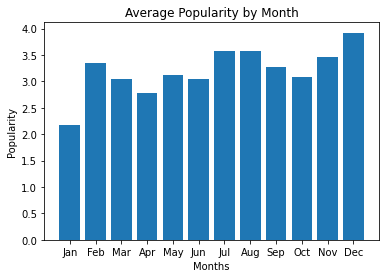

In [173]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots()
ax.bar(months, grouped_tmdb_data['popularity'].mean())
ax.set_title('Average Popularity by Month')
ax.set_xlabel('Months')
ax.set_ylabel('Popularity');

In December there's a high recording of movie popularity thannthe other months, this might be due to families coming together and watching movies. August and July follow in closely as they fall in the summer where most kids are out of school and in recess.
January has the lowest popularity score followed by April.

In [252]:
month_count_dict = {'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0}

for month in budgets_data_latest['release_month']:
    month_count_dict[month] += 1
month_count_dict

{'Jan': 198,
 'Feb': 219,
 'Mar': 261,
 'Apr': 260,
 'May': 221,
 'Jun': 244,
 'Jul': 230,
 'Aug': 264,
 'Sep': 289,
 'Oct': 308,
 'Nov': 251,
 'Dec': 325}

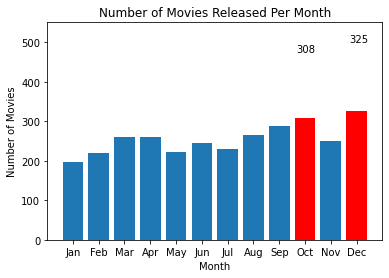

In [253]:
fig,ax = plt.subplots()

months_list = list(month_count_dict.keys())
colors = ['red' if (month == 'Oct' or month =='Dec') else 'tab:blue' for month in months_list]
ax.bar(months_list, month_count_dict.values(), color=colors)
ax.set_title('Number of Movies Released Per Month')
ax.set_xlabel('Month')
ax.set_ylabel("Number of Movies")

ax.set_ylim([0, 550])
plt.annotate('325', (10.70, 500))
plt.annotate('308', (8.65, 475));


December is the most performing month with 325 movies followed by October with 308 movies. 
January is the lowset with 198 movies produced.


## 2. Is there a correlation between production budget and the revenue generated


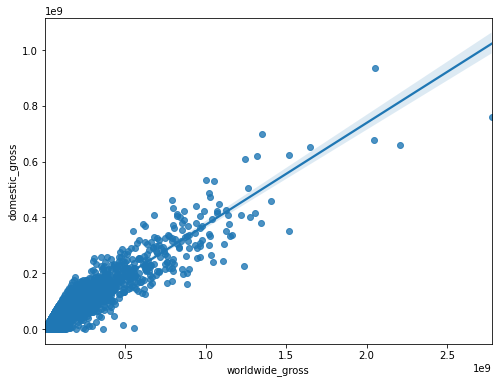

In [283]:
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.regplot(data = budgets_data_clean, x ='worldwide_gross', y='domestic_gross', ax=ax1);

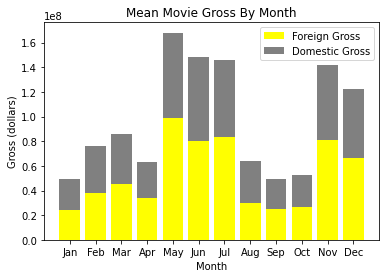

In [196]:
#plotting foreign and domestic growth by month as a stacked bar chart
months = list(month_count_dict.keys())

domestic_gross_mean = budgets_data_month['domestic_gross'].mean()
foreign_gross_mean = budgets_data_month['foreign_gross'].mean()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_mean, label='Foreign Gross', color = 'yellow')
ax.bar(months, domestic_gross_mean, bottom=foreign_gross_mean, label='Domestic Gross', color = 'grey')

ax.set_title("Mean Movie Gross By Month")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (dollars)")

ax.legend();

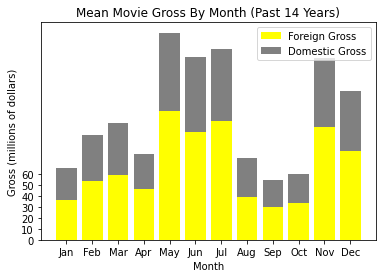

In [260]:
domestic_gross_median = budgets_data_latest_grouped['domestic_gross'].mean()
foreign_gross_median = budgets_data_latest_grouped['foreign_gross'].mean()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_median, label='Foreign Gross', color= 'yellow')
ax.bar(months, domestic_gross_median, bottom=foreign_gross_median, label='Domestic Gross', color = 'grey')

ax.set_title("Mean Movie Gross By Month (Past 14 Years)")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (millions of dollars)")

#function to format y-axis out of scientific notation
def format_number(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter
plt.yticks(np.arange(0, 70_000_000, 10_000_000))
ax.yaxis.set_major_formatter(format_number)



ax.legend();

 July and November  had high mean gross. Based on this analysis, we could say that movies releasing in these 4 months generally experienced the best gross performance.

May was the most strongly affected by using the median instead of the mean. This indicates that May had some outlier movies with high gross. The median could be a better metric for a fledgling movie studio.

Now that we've looked at trends in gross data, we added in budget as another variable for consideration. Return on investment (ROI) here was calculated as the difference between gross and budget, divided by the budget. This provided a ratio of movie profits versus movie costs. Similarly to the gross plots, the mean and median ROI for movies grouped by release month were plotted.

Checking for the correlation

In [282]:

# Extracting relevant columns
production_budget = budgets_data_latest_grouped['production_budget']
worldwide_gross = budgets_data_latest_grouped['worldwide_gross']

# Compute the correlation coefficient
correlation = production_budget.corr(worldwide_gross)

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=production_budget, y=worldwide_gross)
plt.title('Production Budget vs. Worldwide Gross Sales')
plt.xlabel('Production Budget (in millions of dollars)')
plt.ylabel('Worldwide Gross Sales (in millions of dollars)')
plt.grid(True)

TypeError: unsupported type: <class 'pandas.core.groupby.generic.SeriesGroupBy'>

3.  what can we understand from the revenue grenerated during the production process of a movie.

There is a strong correlation between domestic and worldwide gross in the above graph

## 3. Which are the best months to release a movie?



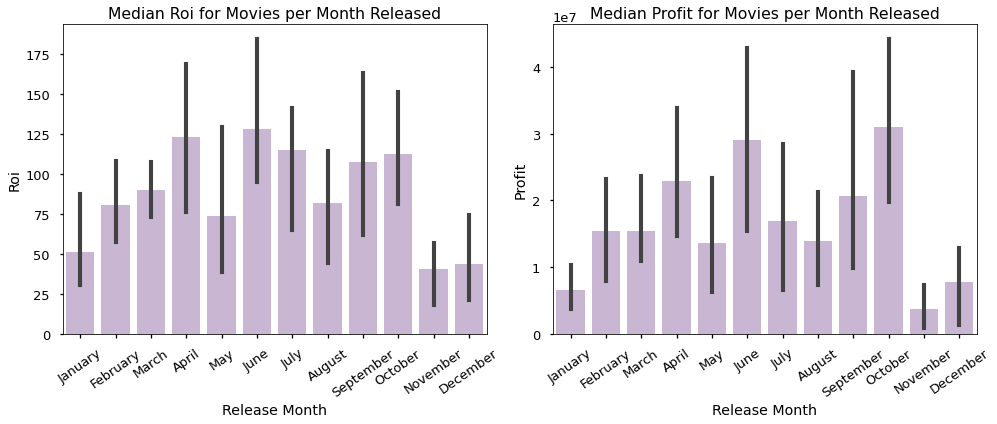

In [251]:

# Order the months so they appear in order from January to December:
budgets_data_clean.sort_values(by='release_month', inplace=True)


with plt.style.context('seaborn-talk'):
    fig, (ax1, ax2) = plt.subplots(figsize=(14,6), ncols=2)
    base_color = sns.color_palette("Paired")[8]
    
    sns.barplot(data=budgets_data_clean, x='release_month', y=budgets_data_latest['roi'], estimator= np.median, ax=ax1,  color = base_color)
    sns.barplot(data=budgets_data_clean, x='release_month', y=budgets_data_latest['profit'], estimator= np.median, ax=ax2, color = base_color)
    
    ax1.set_xticklabels(labels = ['January','February','March','April','May','June',\
                                  'July','August','September','October','November','December']\
                                 ,rotation=35)  
    ax2.set_xticklabels(labels = ['January','February','March','April','May','June',\
                                 'July','August','September','October','November','December']\
                                  ,rotation=35)  

    #ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('%{x:,.0f}'))
    #ax2.yaxis.set_major_formatter(formatter)
    
    ax1.set_title('Median Roi for Movies per Month Released')
    ax2.set_title('Median Profit for Movies per Month Released')
    
    ax1.set_xlabel("Release Month")
    ax2.set_xlabel("Release Month")
    
    ax1.set_ylabel("Roi")
    ax2.set_ylabel("Profit")
    
    fig.tight_layout();
    
    
  







The month with the highest return on investment (ROI) IS June and September for profits. These are the safest months to release a movie due to its lower confidence interval as well. 
The overall idea is that just before the busy holiday season (Christmas, thanksgiving and new years there's ), that being November, December and January there's low returns.
It begins to steadily pick up in February, there is also low activity in May and August
